In [52]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tf_explain.core.grad_cam import GradCAM  # Ensure you have this library installed
import numpy as np
import cv2

# Set up indices, layer name, and image paths
indices = [263, 281]  # Example indices; adjust as needed
layers_name = ['block5_conv3']  # Layer used for Grad-CAM
IMAGE_PATHS = ["man1.png", "man2.png"]

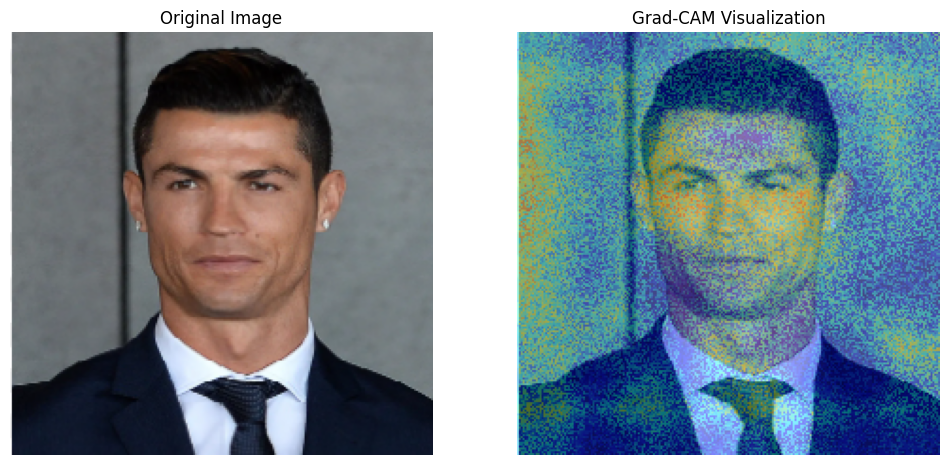

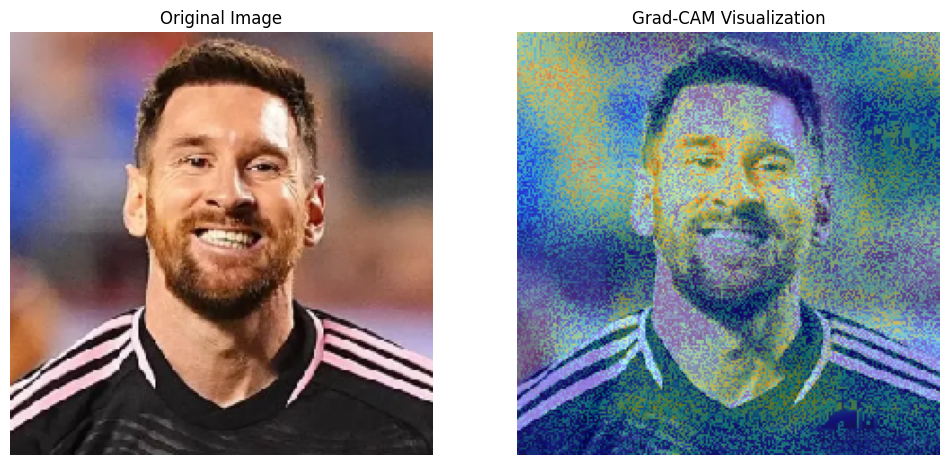

In [54]:
for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    index = indices[i % len(indices)]

    # Load and preprocess the image
    img = load_img(each_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    data = ([img_array], None)  # Prepare input for Grad-CAM

    # Define the name for the result
    name = each_path.split("/")[-1].split(".jpg")[0]

    # Initialize Grad-CAM visualization
    explainer = GradCAM()
    model = VGG16(weights="imagenet", include_top=True)

    # Explain and generate Grad-CAM visualization
    grid = explainer.explain(data, model, index, layers_name[0])

    # Convert Grad-CAM output to an overlay
    heatmap = cv2.resize(grid, (224, 224))
    heatmap = cv2.applyColorMap((heatmap * 255).astype("uint8"), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)

    # Display original and Grad-CAM images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(img))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM Visualization")
    plt.axis("off")

    plt.show()